In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
path="cleaned_airlines.csv"
airlines_cleaned_df=pd.read_csv(path)
airlines_cleaned_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_total_minutes
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,137
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,153
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,137
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,145
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,153
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265,608
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105,642
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099,863
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585,600


In [3]:
airlines_cleaned_df.shape

(300153, 10)

## 1.	Data Preprocessing:

#### 1.1  One Hot Encoding for categorical columns

In [4]:
X = airlines_cleaned_df.drop('price', axis=1)
y = airlines_cleaned_df['price']
X = pd.get_dummies(X, drop_first=True)
print(X.shape)
X.head()

(300153, 30)


,days_left,duration_total_minutes,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,1,137,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,True
1,1,153,False,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,True
2,1,137,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
3,1,145,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,True
4,1,153,False,False,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,True


## 2 Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3 Feature Scaling

In [6]:
## feature scaling is done only for linear regression method as the other methods like Random Forest, XGBoost and CatBoost
## methods can be done even without scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4	Model Implementation:

### a) Linear Regression

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr_model = lr_model.predict(X_test_scaled)

 ### b) Random Forest Regression

In [9]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf_model = rf_model.predict(X_test)

### c) XGBoost Regression

In [10]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb_model = xgb_model.predict(X_test)

### d) CatBoost Regression

In [11]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)

cat_model.fit(X_train, y_train)

y_pred_cat_model = cat_model.predict(X_test)

## 5. Model Evaluation 

### a) Linear Regression

In [24]:
lr_mae = mean_absolute_error(y_test, y_pred_lr_model)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_model))
lr_r2 = r2_score(y_test, y_pred_lr_model)

print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2:", lr_r2)

MAE: 4553.502840123648
RMSE: 6761.940650448946
R2: 0.9112989064713496


### b) Random Forest Regression

In [25]:
rf_mae = mean_absolute_error(y_test, y_pred_rf_model)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_model))
rf_r2 = r2_score(y_test, y_pred_rf_model)

print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)

MAE: 1082.9776942561277
RMSE: 2784.777745518331
R2: 0.9849558607743317


In [ ]:
## 5-Fold Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')


print(f"--- Random Forest Stability Check ---")
print(f"Individual Fold R2 Scores: {cv_scores_rf}")
print(f"Mean R2 Score: {cv_scores_rf.mean():.4f}")
print(f"Standard Deviation: {cv_scores_rf.std():.4f}")

if cv_scores_rf.mean() > 0.95:
    print("Result: This model is exceptionally accurate and reliable!")

--- Random Forest Stability Check ---
Individual Fold R2 Scores: [0.98392503 0.98388291 0.98431606 0.98384384 0.98382618]
Mean R2 Score: 0.9840
Standard Deviation: 0.0002
Result: This model is exceptionally accurate and reliable!


### c)  XGBoost Regression

In [26]:
xgb_mae = mean_absolute_error(y_test, y_pred_xgb_model)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_model))
xgb_r2 = r2_score(y_test, y_pred_xgb_model)

print("MAE:", xgb_mae)
print("RMSE:", xgb_rmse)
print("R2:", xgb_r2)

MAE: 2164.511474609375
RMSE: 3788.629963456447
R2: 0.9721547961235046


### d) CatBoost Regression

In [27]:
cat_mae = mean_absolute_error(y_test, y_pred_cat_model)
cat_rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat_model))
cat_r2 = r2_score(y_test, y_pred_cat_model)

print("MAE:", cat_mae)
print("RMSE:", cat_rmse)
print("R2:", cat_r2)

MAE: 2491.316834481548
RMSE: 4281.289311209689
R2: 0.9644421561979679


## 6. Feature Selection:

In [28]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
29,class_Economy,0.766745
6,airline_Vistara,0.057379
1,duration_total_minutes,0.051515
0,days_left,0.023631
2,airline_Air_India,0.017417
4,airline_Indigo,0.016695
18,stops_zero,0.014561
3,airline_GO_FIRST,0.010798
17,stops_two_or_more,0.004118
8,source_city_Delhi,0.003425


from the feature importance analysis, class_Economy is the most dominant feature (~88%), 
followed by duration_total_minutes and days_left. Other features contribute minimally.

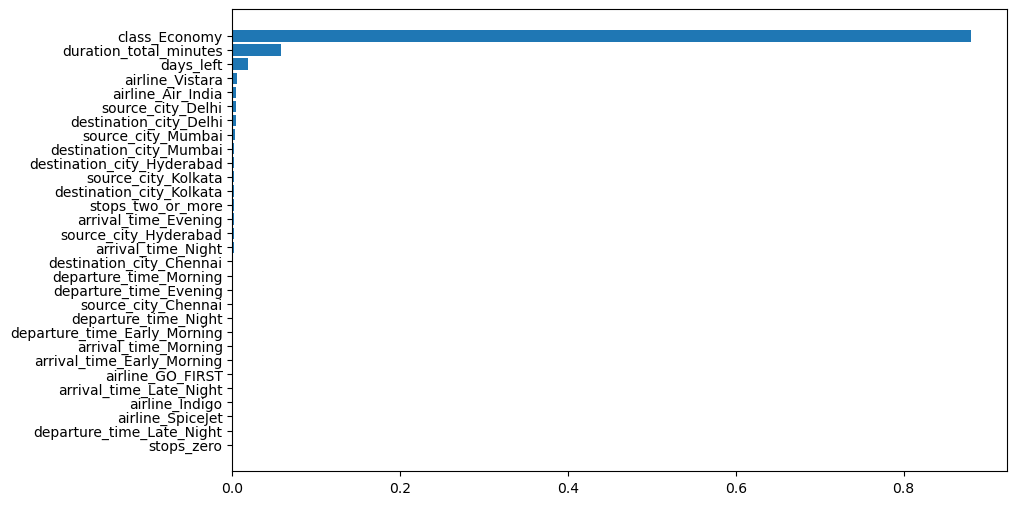

In [17]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.show()

In [18]:
selected_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [19]:
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)

print("R2 Score:", rf_selected.score(X_test_selected, y_test))

R2 Score: 0.9214171389606791


## 7.	Hyperparameter Tuning:

#### 7.1 RandomizedSearch CV

 This tuning is done on a small susbset of the data taken 

In [20]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50, 100, 150],        
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


sample_frac = 0.3
X_small = X_train.sample(frac=sample_frac, random_state=42)
y_small = y_train.loc[X_small.index]


random_search = RandomizedSearchCV(
    estimator=rf_model,        
    param_distributions=param_dist,
    n_iter=25,           
    cv=3,
    verbose=2,
    n_jobs=1,            
    random_state=42
)


random_search.fit(X_small, y_small)


print(" Best Hyperparameters:", random_search.best_params_)


rf_model.set_params(**random_search.best_params_)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
print(" R2 Score on Test Set:", r2_score(y_test, y_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estima

now we will tune it for full data

In [21]:
from sklearn.ensemble import RandomForestRegressor


best_params = random_search.best_params_

fast_rf = RandomForestRegressor(
    **best_params,
    random_state=42,
    n_jobs=1
)

fast_rf.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = fast_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(" Fast R2 on Full Data:", r2)

 Fast R2 on Full Data: 0.9838403187124197


## 8.	Feature Importance:


#### 8.1 Using XGBoost

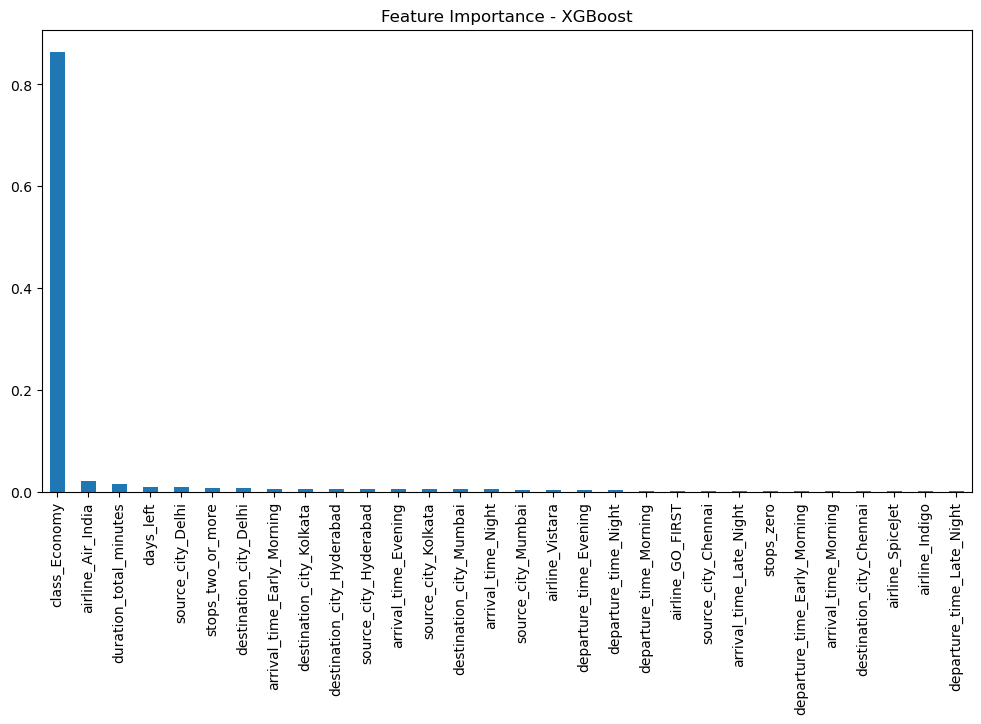

In [22]:


feat_imp = pd.Series(xgb_model.feature_importances_, index=X_train.columns)


feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance - XGBoost")
plt.show()

## 9. Comparison Metrics 

--- Model Performance Comparison ---


,Model,MAE,RMSE,R2 Score
0,Random Forest,1082.977694,2784.777746,0.984956
1,XGBoost,2164.511475,3788.629963,0.972155
2,CatBoost,2491.316834,4281.289311,0.964442
3,Linear Regression,4553.502840,6761.940650,0.911299


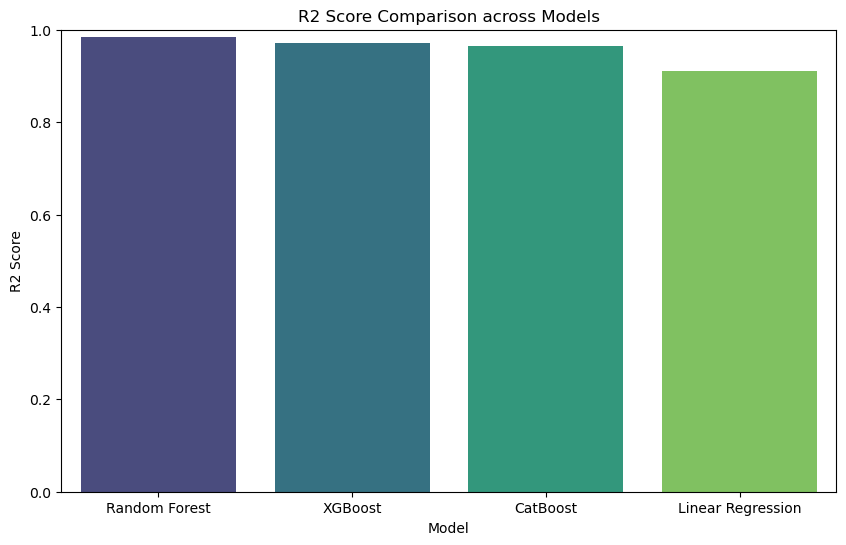

In [29]:

results_data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'CatBoost'],
    'MAE': [lr_mae, rf_mae, xgb_mae, cat_mae],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse, cat_rmse],
    'R2 Score': [lr_r2, rf_r2, xgb_r2, cat_r2]
}


comparison_df = pd.DataFrame(results_data)
comparison_df = comparison_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)


print("--- Model Performance Comparison ---")
display(comparison_df.style.background_gradient(cmap='Greens', subset=['R2 Score'])\
                        .background_gradient(cmap='Reds', subset=['MAE', 'RMSE']))


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=comparison_df, palette='viridis')
plt.title('R2 Score Comparison across Models')
plt.ylim(0, 1) # Since R2 is between 0 and 1
plt.show()

In [33]:
import pickle

with open('airline_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully as airline_rf_model.pkl")

Model saved successfully as airline_rf_model.pkl
